# T-test

In [1]:
import pandas as pd
from scipy import stats # 통계 모듈 불러오기
import numpy as np
import matplotlib.pyplot as plt #시각화 패키지
import seaborn as sns 


data = pd.read_csv("nyc_citibike.csv")
data

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register
0,2018-05-01,2018-05-01,4,4,390,3002,South End Ave & Liberty St,40.711512,-74.015756,79,Franklin St & W Broadway,40.719116,-74.006667,21105,Subscriber,1945,male,36
1,2018-05-01,2018-05-01,1,1,854,3611,Vernon Blvd & 47 Rd,40.744907,-73.953457,3572,34 Ave & 38 St,40.756913,-73.921631,32219,Subscriber,1998,male,29
2,2018-05-01,2018-05-01,4,4,526,515,W 43 St & 10 Ave,40.760094,-73.994618,388,W 26 St & 10 Ave,40.749718,-74.002950,33433,Subscriber,1954,male,55
3,2018-05-01,2018-05-01,3,3,885,3641,Broadway & W 25 St,40.742869,-73.989186,336,Sullivan St & Washington Sq,40.730477,-73.999061,32028,Subscriber,1963,male,32
4,2018-05-01,2018-05-01,1,1,324,3440,Fulton St & Adams St,40.692418,-73.989495,3308,Kane St & Clinton St,40.686176,-73.996453,26425,Subscriber,1965,male,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72030,2018-05-01,2018-05-01,23,23,207,3452,Bayard St & Leonard St,40.719156,-73.948854,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,16883,Subscriber,1994,female,12
72031,2018-05-01,2018-05-01,23,23,356,151,Cleveland Pl & Spring St,40.722104,-73.997249,319,Fulton St & Broadway,40.711066,-74.009447,17406,Subscriber,1994,male,21
72032,2018-05-01,2018-05-01,22,23,516,526,E 33 St & 5 Ave,40.747659,-73.984907,435,W 21 St & 6 Ave,40.741740,-73.994156,29964,Subscriber,1975,male,37
72033,2018-05-01,2018-05-01,22,23,427,379,W 31 St & 7 Ave,40.749156,-73.991600,477,W 41 St & 8 Ave,40.756405,-73.990026,20511,Subscriber,1972,male,14


In [2]:
#sns 그래프 이쁘게 그리는 tool
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

# 단일 표본 T-test 
nyc_citibike.csv 데이터의 trip_duration 칼럼에서<br/>
전체 데이터를 모집단으로 여기고, 40개의 표본을 추출해 모평균에 대한 단일 표본 T-test 를 진행해보자<br/>


#### 가설세우기 H0: $\mu$ = $\mu$0 ,  H0: $\mu$ != $\mu$0

Skewness: 116.002624
Kurtosis: 15913.196644


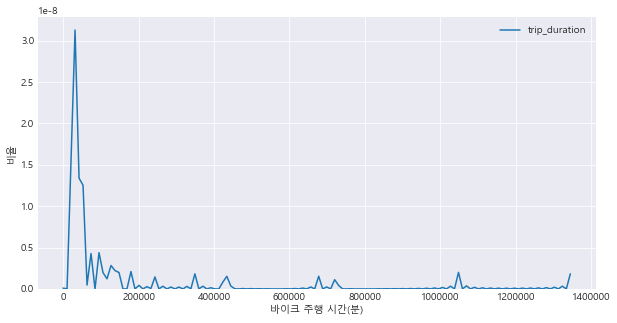

In [28]:
#trip_duration의 분포 데이터
td=data.trip_duration #trip_duration 데이터만 td라고 저장하기
plt.figure(figsize=(10,5))
kdep=sns.kdeplot(td) 
kdep.set_xlabel("바이크 주행 시간(분)")
kdep.set_ylabel("비율")
print("Skewness: %f" % td.skew()) #Skewness: 왜도, 데이터의 비대칭성 정도를 나타냄. 0에 가까울 수록 정규분포와 비슷
print("Kurtosis: %f" % td.kurt()) #Kurtosis: 첨도, 데이터 분포의 뽀족한 정도를 나타냄. 0에 가까울 수록 정규 분포와 비슷
plt.show() 

과하게 왼쪽으로 치우쳐져 있으니, 전체 분포에 비해 너무 큰 값들이 있다. 이 값들을 outlier로 제거해 주자<br/>
#### 또한, 이렇게 과하게 크거나 작은 값들이 있는 분포는 평균이 이 소수의 값들에 의해 좌지우지 되므로, 평균 비교가 의미가 없다

Skewness: 0.863209
Kurtosis: -0.108253


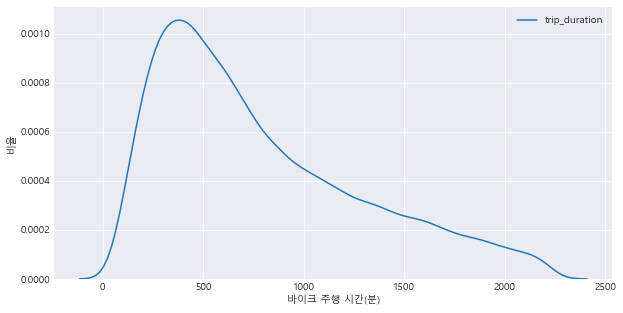

In [29]:
td_cut=td[td<td.quantile(0.95)]#td값 중 상위 5% 빼주기
plt.figure(figsize=(10,5))
kdep=sns.kdeplot(td_cut) 
kdep.set_xlabel("바이크 주행 시간(분)")
kdep.set_ylabel("비율")
print("Skewness: %f" % td_cut.skew())
print("Kurtosis: %f" % td_cut.kurt())
plt.show() 

첨도와 왜도가 많이 줄어들었다. 정규분포와 동일하지는 않지만 정규분포에 비슷할 수록 크기가 큰 표본에 대해 정규성을 보장하는 정도가 강해진다

In [30]:
# trip_duration의 평균, 표준편차

avg = td_cut.mean()
std = td_cut.std()
print('평균 :',avg,'표준 편차 :',std)

평균 : 786.3930612185248 표준 편차 : 509.4961402212798


### H0: $\mu$ = 786 

In [31]:
# 랜덤하게 40개의 난수를 추출

np.random.seed(1)
rand_40 = np.random.choice(td_cut, 40) #랜덤 추출

In [33]:
#단일 표본 t-test : 정말 평균이 786일까?
#Ho: 평균 = 786
#H1: 평균 != 786
tTestResult= stats.ttest_1samp(rand_40,786) #stats.ttest_1samp -> 단일 표본 ttest
print("T-statistic : %.3f  p-value : %.3f" % tTestResult)

T-statistic : 0.045  p-value : 0.964


#### p-value 가 0.05보다 월등히 크므로 H0 를 기각할 수 없다. 즉, 모평균은 786이다. 

In [34]:
#stats.ttest_1samp(sample,value)를 하면 다음과 같이 (검정 통계량, p-value)의 tuple 자료가 만들어짐. 
tTestResult

Ttest_1sampResult(statistic=0.045201914863605676, pvalue=0.964177029201091)

### 단일 표본 t-test의 경우 정규성을 체크 해 줘야 하지만 표본의 크기가 40으로 충분히 크므로 생략

##  표본의 크기가 작은 경우 (n=15)

In [44]:
# 랜덤하게 15개의 난수를 추출

np.random.seed(1)
rand_15 = np.random.choice(td_cut, 15) #랜덤 추출

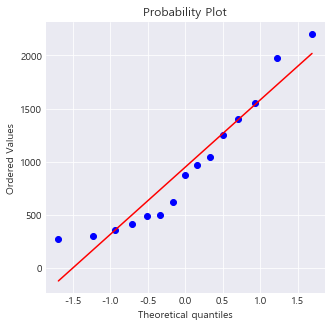

In [45]:
#qq-plot: 정규성을 만족시키는지 보기 위한 그래프로 빨간 선에 근접하게 점이 분포 될 수록 정규성을 만족
from scipy.stats import probplot
plt.figure(figsize=(5,5))
probplot(rand_15, plot=plt) # qqplot을 그려주는 함수
plt.show()


In [46]:
#정규성 검정 : shapiro test
#H0: 정규성을 만족한다.
#H1: 정규성을 만족하지 않는다.
from scipy import stats
print('정규성 검정의 P-value는 ' , stats.shapiro(rand_15)[1])


정규성 검정의 P-value는  0.11000926792621613


In [49]:
#이 값도 (검정통계량, p-value) 순서라서 [1]로 p-value 호출
stats.shapiro(rand_15)

(0.9041135311126709, 0.11000926792621613)

P-value가 0.05보다 크므로, 귀무가설을 기각할 수 없고, 정규성을 만족.

# 독립 표본 T-test
전체 데이터를 모집단으로 여기고,독립 표본 T-test 를 진행해보자.  
출생 년도에 따라 사용자의 자전거 사용 시간(trip_duration)의 평균을 비교하자 

->birth_year에서 2 그룹을 정하고 40명 씩 뽑아 표본을 만들어 각 trip_duration의 평균을 비교해보자!

In [178]:
data.birth_year.value_counts()
#1988년 생과 1990년생 비교!

1969    7980
1988    2661
1990    2621
1989    2600
1991    2564
        ... 
1894       1
1895       1
1938       1
1918       1
1885       1
Name: birth_year, Length: 84, dtype: int64

In [181]:
td_88=data[data.birth_year==1988].trip_duration
td_90=data[data.birth_year==1990].trip_duration

In [204]:
#단일 표본에서와 마찬가지로 상위 5% 제거
td_88_cut=td_88[td_88<td_88.quantile(0.95)]
td_90_cut=td_90[td_90<td_90.quantile(0.95)]

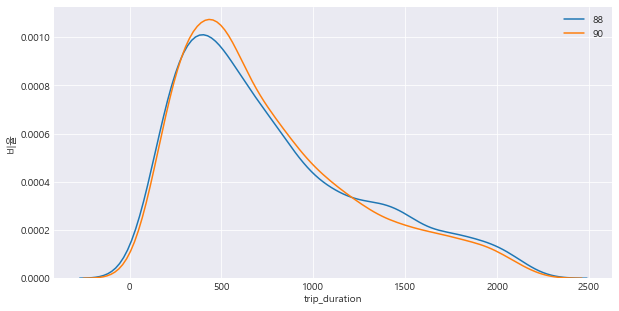

In [205]:
plt.figure(figsize=(10,5))
kdep=sns.kdeplot(td_88_cut) 
sns.kdeplot(td_90_cut)
kdep.set_xlabel("trip_duration")
kdep.set_ylabel("비율")
plt.legend(['88','90'])# 그래프마다 이름을 붙여줌!
plt.show() 

### H0: $\mu_x=\mu_y$

In [196]:
#독립 표본 t-검정
#각각 40개씩 추출
np.random.seed(2)

group1 = np.random.choice(td_88_cut, 40) 
group2 = np.random.choice(td_90_cut, 40) 

두 표본 모두 크기가 40으로 충분히 크므로, 정규성 체크는 생략<br/>
서로 다른 모집단에서 랜덤으로 뽑았으므로 독립성 체크도 생략

#### 독립 표본 T-test는 분산이 같냐 다르냐가 중요하다고 했어!!!!!

### 등분산 검정

In [198]:
#등분산 체크는 levene test로
#HO: 두 모집단의 분산이 같다.
#H1: 두 모집단의 분산이 다르다.
from scipy.stats import levene
print('등분산 검정 P-value=',levene(group1,group2)[1])


등분산 검정 P-value= 0.9749603579100367


P-value가 0.05보다 아주 크므로, 귀무가설 기각 불가. 따라서 분산이 같다는 가정 하에 검정

In [200]:

#두 집단의 분산이 같을 때의 결과
tTestResult= stats.ttest_ind(group1, group2)
 
#(혹시 분산이 다를 경우)두 집단의 분산이 다를 때의 결과 (equal_var=False를 붙여줌)
tTestResultDiffVar= stats.ttest_ind(group1, group2, equal_var=False)
 
print("두 집단의 분산이 같을 때 t-statistic: %.3f p-value : %.3f." % tTestResult)
print("두 집단의 분산이 다를 때 t-statistic: %.3f p-value : %.3f."  % tTestResultDiffVar)


두 집단의 분산이 같을 때 t-statistic: 0.237 p-value : 0.813.
두 집단의 분산이 다를 때 t-statistic: 0.237 p-value : 0.813.



#### p-value 가 0.05 보다 월등히 크기 떄문에 귀무가설을 기각할 수 없다. 즉, 88년생과 90년생의 이용시간 평균이 같다.

# 대응 표본 T-test

nyc citibike 회사에서 자전거 대여 요금 할인 이벤트를 진행했다고 한다.  
이벤트 이후 사람들의 대여시간이 달라졌는지 알아보자.  
(이벤트 외의 다른 모든 조건은 동일하다고 가정한다.)

In [52]:
data_p = pd.read_csv('event_effect.csv')
data_p.head()

,id,trip_duration_before,trip_duration_after
0,1,301.728750,405.901958
1,2,304.366383,458.114289
2,3,373.389837,533.215894
3,4,391.290559,576.666999
4,5,396.624250,585.691675


In [53]:
len(data_p)

500

표본이 충분히 크므로, 정규성 체크는 생략

### H0: $\mu_d=0$, H1: $\mu_d!=0$

In [55]:
#H0:  𝜇𝑑=0
#H1: 𝜇𝑑!=0
stats.ttest_rel(data_p['trip_duration_before'],data_p['trip_duration_after'])

Ttest_relResult(statistic=-84.87014559504613, pvalue=1.0876472817241415e-298)

#### p-value 가 0.05보다 작기 떄문에 귀무가설을 기각한다. 즉, 할인 이벤트 전후로 대여 시간에 차이가 있다.

# 단측 검정

### H0: $\mu_d=0$, H1: $\mu_d<0$

In [2]:
stats.ttest_rel?

In [61]:
#H0:  𝜇𝑑=0
#H1: 𝜇𝑑<0 (이벤트 후에 대여시간이 증가 했다!)
test_result=stats.ttest_rel(data_p['trip_duration_before'],data_p['trip_duration_after'])
print("양측 검정의  t-statistic: %.3f p-value : %f."  % test_result)
if (test_result[0]<0) & (test_result[1]/2<0.05):  #H1이 𝜇𝑑<0 이니까 검정통계량이 0보다 크면 p-value는 0.5보다 커서 자동 기각 불가!
    print('귀무가설 기각!: 이벤트가 효과가 있었어!!!')
else:
    print('귀무가설 기각 불가!: 이벤트는 돈낭비였구먼')

양측 검정의  t-statistic: -84.870 p-value : 0.000000.
귀무가설 기각!: 이벤트가 효과가 있었어!!!
